# APPLIED MACHINE LEARNING PROJECT


## Required Tools:  

Pandas and Numpy for data analysis.  
Sklearn to validate the model.  
Seaborn and Matplotlib to plot a nice graph.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATA:
reading csv file using pandas

In [3]:
df=pd.read_csv('spotify_data.csv')  

In [4]:
df.head()           # top 5 rows of the dataset

,Unnamed: 0,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,NaN,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,NaN,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,NaN,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,NaN,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,NaN,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [5]:
len(df)

686

In [6]:
len(df["id"].value_counts())

686

In [7]:
len(df.columns)

20

## DATA PREPROCESSING:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        0 non-null      float64
 1   name              686 non-null    object 
 2   album             686 non-null    object 
 3   artist            686 non-null    object 
 4   id                686 non-null    object 
 5   release_date      686 non-null    object 
 6   popularity        686 non-null    int64  
 7   length            686 non-null    int64  
 8   danceability      686 non-null    float64
 9   acousticness      686 non-null    float64
 10  energy            686 non-null    float64
 11  instrumentalness  686 non-null    float64
 12  liveness          686 non-null    float64
 13  valence           686 non-null    float64
 14  loudness          686 non-null    float64
 15  speechiness       686 non-null    float64
 16  tempo             686 non-null    float64
 1

In [9]:
df.describe()

,Unnamed: 0,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature
count,0.0,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,NaN,41.534985,221791.485423,0.500553,0.449749,0.507693,0.349610,0.166867,0.342438,-11.531020,0.053946,119.134679,5.335277,3.870262
std,NaN,23.045707,63399.058492,0.158955,0.410729,0.326490,0.410517,0.142128,0.252304,7.468629,0.041374,28.978685,3.550858,0.500297
min,NaN,0.000000,76773.000000,0.078900,0.000005,0.001290,0.000000,0.031800,0.035300,-42.018000,0.023200,50.960000,0.000000,1.000000
25%,NaN,30.000000,179114.500000,0.388000,0.014825,0.202000,0.000034,0.092500,0.131250,-15.858750,0.033200,99.008750,2.000000,4.000000
50%,NaN,47.000000,213273.000000,0.505000,0.359000,0.495500,0.026350,0.111000,0.282000,-9.358000,0.040700,120.071000,6.000000,4.000000
75%,NaN,57.000000,254569.750000,0.612000,0.905750,0.844000,0.858250,0.173750,0.508750,-5.634500,0.057375,132.953250,9.000000,4.000000
max,NaN,88.000000,518373.000000,0.941000,0.996000,0.994000,0.966000,0.963000,0.977000,1.342000,0.416000,217.950000,11.000000,5.000000


In [10]:
df=df.drop(['Unnamed: 0' ,'name','album','artist','id','release_date'],axis=1 )   # dropping columns 

In [11]:
df.head()

,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


  
The main data have 800 rows and 18 columns, but for information reduction purposes I decided to use the features of Length, Danceability, Acousticness, Energy, Instrumentalness, Liveness, Valence, Loudness, Speechiness and Tempo because they have more influence to classify the tracks.

  

In [12]:
df['mood'].value_counts()   #count of each unique label

Sad          197
Calm         195
Energetic    154
Happy        140
Name: mood, dtype: int64

In [13]:
len(df)

686

In [14]:
df.isnull().sum()     # checking for null values

popularity          0
length              0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
tempo               0
key                 0
time_signature      0
mood                0
dtype: int64

In [15]:
df.drop_duplicates()

,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,68,379266,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,Happy
1,43,318800,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,Sad
2,60,217946,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,Sad
3,2,233000,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,Happy
4,60,268000,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,36,123066,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,Calm
682,5,435080,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,Sad
683,87,169265,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,Sad
684,76,219146,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,Sad


In [16]:
df.columns

Index(['popularity', 'length', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'valence', 'loudness', 'speechiness',
       'tempo', 'key', 'time_signature', 'mood'],
      dtype='object')

## DATA VISUALISATION:

<AxesSubplot:xlabel='mood', ylabel='count'>

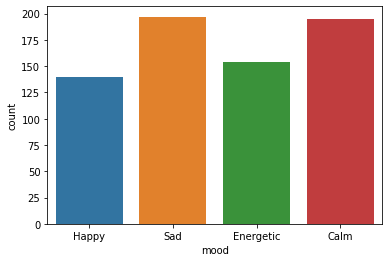

In [17]:
sns.countplot(data=df ,x='mood')

PLOTTING THE CORRELATION AMONG THE FEATURES(NUMERIC) USING HEATMAP:

<AxesSubplot:>

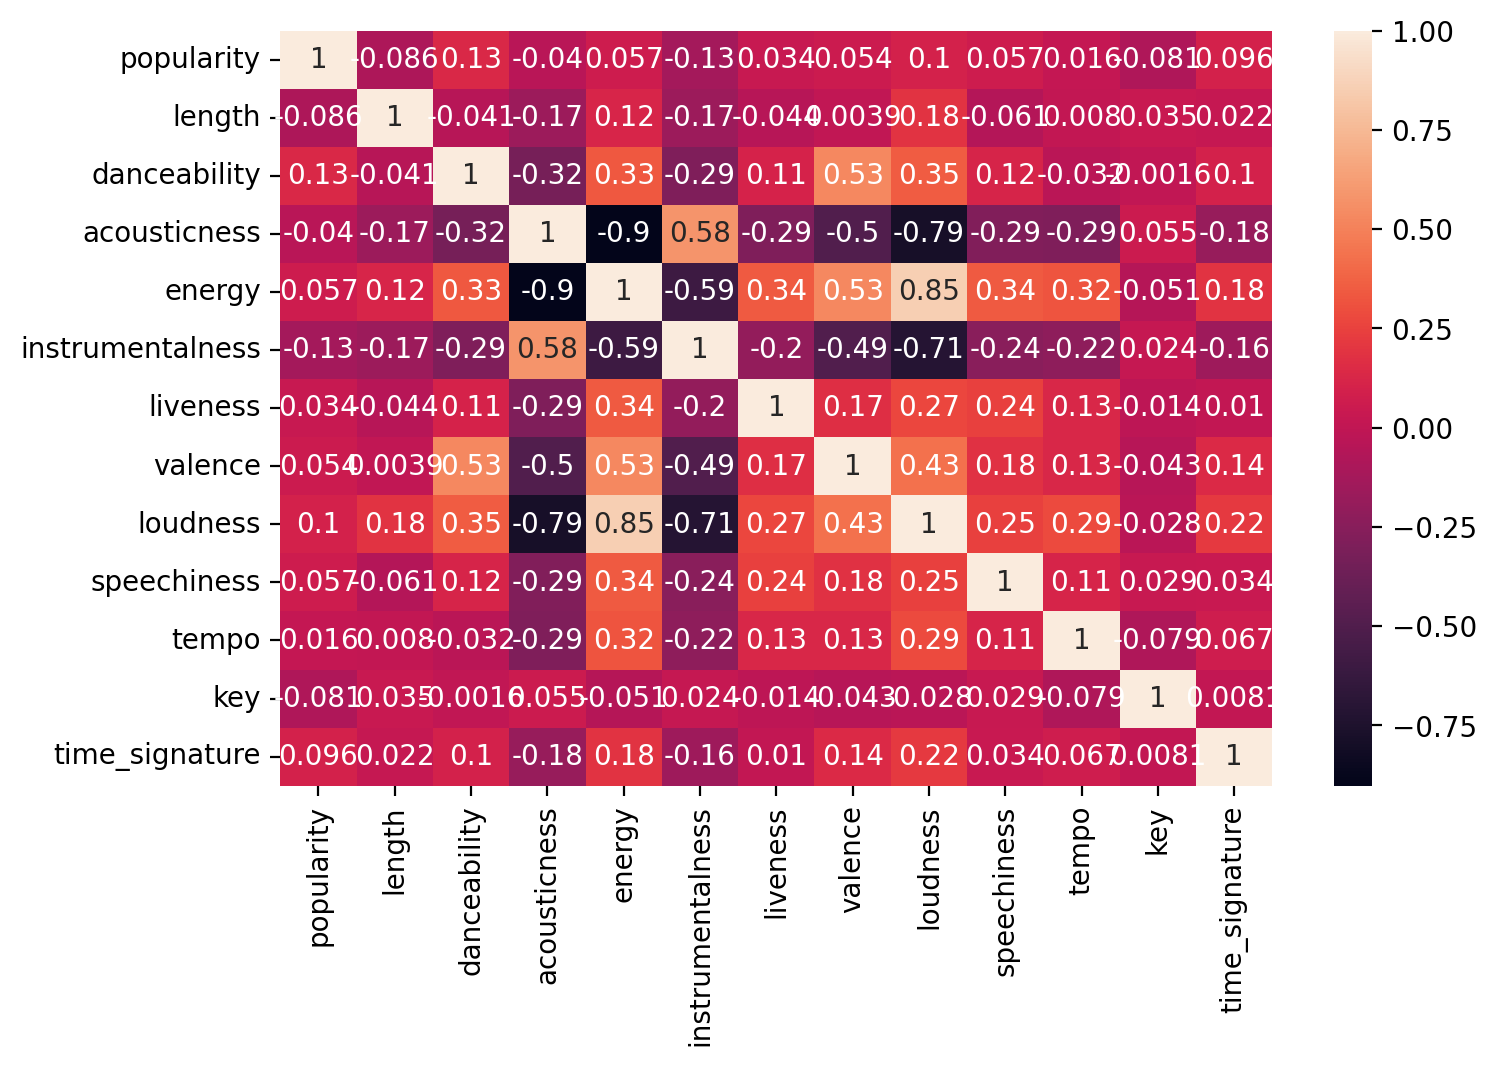

In [18]:
plt.figure(figsize=(8,5),dpi=200)
sns.heatmap(df.corr(),annot=True)

In [19]:
df.head()

,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


CATEGORIZING DATA INTO FEATURES AND LABEL  
FEATURES: are known characterstics and components of data  
LABEL: is what we are trying to predict

In [20]:
X=df.drop('mood',axis=1)
y=df['mood']

# TRAIN TEST SPLIT:  
splitting the data into traing data and test data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.20 ,random_state=101)

# SCALING :  
Scaling of the data comes under the set of steps of data pre-processing when we are performing machine learning algorithms in the data set.  
The machine learning models provide weights to the input variables according to their data points and inferences for output. In that case, if the difference between the data points is so high, the model will need to provide the larger weight to the points and in final results, the model with a large weight value is often unstable. This means the model can produce poor results or can perform poorly during learning.  
  
Feature scaling provides many benefits to our machine learning process!  

Some machine learning models that rely on distance metrics (e.g. KNN) require scaling to perform well.



In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

# LOGISTIC REGRESSION WITH GRID SEARCHCV:

### GridSearch for Best Hyper-Parameters

Main parameter choices are regularization penalty choice and regularization C value.

In [25]:
from sklearn.linear_model import LogisticRegression
# Depending on warnings you may need to adjust max iterations allowed 
# Or experiment with different solvers
log_model = LogisticRegression(solver='saga',max_iter=5000)

# ovs meaning one versus rest features

from sklearn.model_selection import GridSearchCV
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 10, 5)
grid_model=GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty} )
grid_model.fit(scaled_X_train,y_train)
grid_model.best_params_

{'C': 316.22776601683796, 'penalty': 'l1'}

In [26]:
y_preds=grid_model.predict(scaled_X_test)

In [27]:
y_preds

array(['Energetic', 'Happy', 'Happy', 'Calm', 'Happy', 'Sad', 'Sad',
       'Calm', 'Sad', 'Sad', 'Calm', 'Calm', 'Calm', 'Calm', 'Sad',
       'Calm', 'Calm', 'Sad', 'Calm', 'Happy', 'Energetic', 'Happy',
       'Happy', 'Sad', 'Happy', 'Energetic', 'Energetic', 'Energetic',
       'Calm', 'Energetic', 'Energetic', 'Sad', 'Energetic', 'Sad',
       'Happy', 'Calm', 'Happy', 'Energetic', 'Sad', 'Calm', 'Happy',
       'Calm', 'Energetic', 'Energetic', 'Happy', 'Calm', 'Sad', 'Sad',
       'Happy', 'Energetic', 'Happy', 'Happy', 'Calm', 'Sad', 'Sad',
       'Happy', 'Calm', 'Energetic', 'Sad', 'Energetic', 'Calm', 'Sad',
       'Happy', 'Calm', 'Calm', 'Calm', 'Energetic', 'Calm', 'Sad',
       'Happy', 'Happy', 'Energetic', 'Sad', 'Sad', 'Calm', 'Energetic',
       'Calm', 'Happy', 'Energetic', 'Sad', 'Sad', 'Calm', 'Calm', 'Sad',
       'Energetic', 'Calm', 'Happy', 'Sad', 'Sad', 'Calm', 'Calm',
       'Energetic', 'Energetic', 'Calm', 'Energetic', 'Energetic', 'Calm',
       'Calm', 

## PERFORMANCE EVALUATION:

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [29]:
accuracy_score(y_test,y_preds)

0.8333333333333334

C:\python 3.10\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


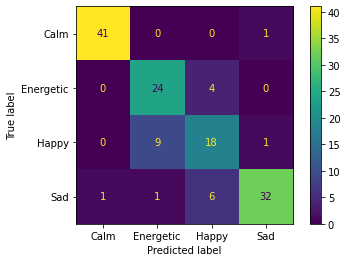

In [30]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test);

In [31]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

        Calm       0.98      0.98      0.98        42
   Energetic       0.71      0.86      0.77        28
       Happy       0.64      0.64      0.64        28
         Sad       0.94      0.80      0.86        40

    accuracy                           0.83       138
   macro avg       0.82      0.82      0.81       138
weighted avg       0.84      0.83      0.84       138



## Evaluating ROC Curves and AUC

 We need to manually create the plots for a Multi-Class situation. Fortunately, Scikit-learn's documentation already has plenty of examples on this.**

Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

We have created a function  that does this automatically, essentially creating and plotting an ROC per class.

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one.

ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-label classification, it is necessary to binarize the output. 

In [32]:
from sklearn.metrics import roc_curve, auc 

In [33]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

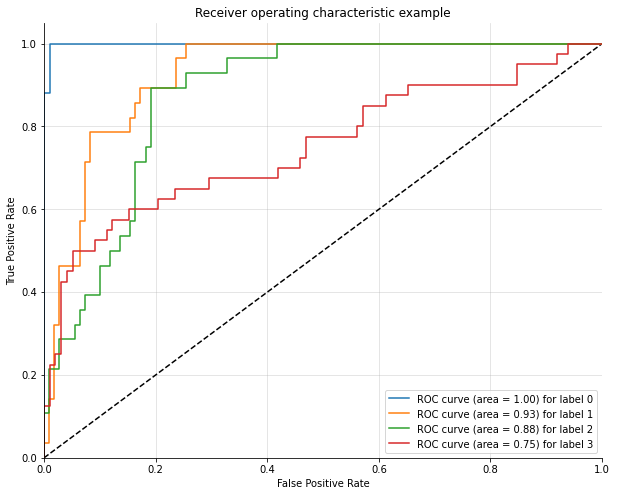

In [68]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=4, figsize=(10, 8))

## SVM WITH GRIDSEARCHCV:

In [35]:
from sklearn.svm import SVC

In [36]:
svm_model=SVC()
param_grid ={'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid=GridSearchCV(svm_model , param_grid)

In [37]:
grid.fit(scaled_X_train ,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [38]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

NOW WE'LL EVALUATE OUR MODEL BASED ON THE BEST PARAMETERS:

In [39]:
y_preds=grid.predict(scaled_X_test)

In [40]:
print(classification_report(y_test ,y_preds))

              precision    recall  f1-score   support

        Calm       0.98      0.98      0.98        42
   Energetic       0.71      0.86      0.77        28
       Happy       0.66      0.68      0.67        28
         Sad       0.97      0.80      0.88        40

    accuracy                           0.84       138
   macro avg       0.83      0.83      0.82       138
weighted avg       0.85      0.84      0.84       138



# KNN  MODEL:

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn_model=KNeighborsClassifier()

## Elbow Method for Choosing Reasonable K Values

**NOTE: This uses the test set for the hyperparameter selection of K.**

In [43]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [44]:
test_error_rates

[0.23188405797101452,
 0.23913043478260865,
 0.21739130434782605,
 0.18840579710144922,
 0.16666666666666663,
 0.1594202898550725,
 0.14492753623188404,
 0.17391304347826086,
 0.14492753623188404,
 0.1594202898550725,
 0.15217391304347827,
 0.1594202898550725,
 0.1376811594202898,
 0.1376811594202898,
 0.13043478260869568,
 0.1594202898550725,
 0.1594202898550725,
 0.1594202898550725,
 0.1594202898550725,
 0.1594202898550725,
 0.16666666666666663,
 0.1594202898550725,
 0.1594202898550725,
 0.1594202898550725,
 0.16666666666666663,
 0.16666666666666663,
 0.17391304347826086,
 0.17391304347826086,
 0.17391304347826086]

Text(0.5, 0, 'K Neighbors')

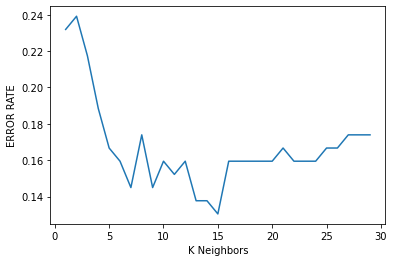

In [45]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors')

### Creating a Pipeline to find K value



We'll use a Pipeline object to set up a workflow of operations:

1. Scale Data
2. Create Model on Scaled Data

----



When you use the StandardScaler as a step inside a Pipeline then scikit-learn will internally do the job for you.

What happens can be discribed as follows:

* Step 0: The data are split into TRAINING data and TEST data according to the cv parameter that you specified in the GridSearchCV.
* Step 1: the scaler is fitted on the TRAINING data
* Step 2: the scaler transforms TRAINING data
* Step 3: the models are fitted/trained using the transformed TRAINING data
* Step 4: the scaler is used to transform the TEST data
* Step 5: the trained models predict using the transformed TEST data

----

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler=StandardScaler()
knn =KNeighborsClassifier()
# Highly recommend string code matches variable name!

operations =[('scaler',scaler),('knn',knn)]

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe =Pipeline(operations)

k_values=list(range(1,20))
param_grid={'knn__n_neighbors':k_values}
full_cv_classifier=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
# Use full X and y if you DON'T want a hold-out test set
# Use X_train and y_train if you DO want a holdout test set (X_test,y_test)
full_cv_classifier.fit(X_train,y_train)
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=10))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=10),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 10,
 'knn__p': 2,
 'knn__weights': 'uniform'}

---
*Note: If your parameter grid is going inside a PipeLine, your parameter name needs to be specified in the following manner:**

* chosen_string_name + **two** underscores + parameter key name
* model_name + __ + parameter name
* knn_model + __ + n_neighbors
* knn_model__n_neighbors

[StackOverflow on this](https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline)

The reason we have to do this is because it let's scikit-learn know what operation in the pipeline these parameters are related to (otherwise it might think n_neighbors was a parameter in the scaler).

---

In [59]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [60]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.7206839 , 0.74083403, 0.75547957, 0.75904921, 0.77542952,
       0.78640534, 0.78096747, 0.79192661, 0.78275229, 0.80106756,
       0.79379483, 0.79557965, 0.79739783, 0.77906589, 0.79549625,
       0.78640534, 0.77728107, 0.77366138, 0.78458716])

In [61]:
len(full_cv_classifier.cv_results_['mean_test_score'])

19

In [62]:
full_predictions=full_cv_classifier.predict(X_test)

In [63]:
print(classification_report(y_test,full_predictions))

              precision    recall  f1-score   support

        Calm       0.98      1.00      0.99        42
   Energetic       0.65      0.86      0.74        28
       Happy       0.68      0.61      0.64        28
         Sad       1.00      0.82      0.90        40

    accuracy                           0.84       138
   macro avg       0.83      0.82      0.82       138
weighted avg       0.86      0.84      0.84       138

